In [1]:
import os
import zipfile

In [2]:
zip_files = ['archive']

for zip_file in zip_files:
    with zipfile.ZipFile("archive.zip".format(zip_file)) as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

archive unzipped


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from sklearn.preprocessing import OneHotEncoder #for data preprocessing
from sklearn.preprocessing import StandardScaler #for scaling data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#for data preprocessing using keras
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#for building Deep CNN model
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from keras.utils import plot_model
from keras.metrics import Accuracy 
import graphviz
import pydot

In [4]:
images = []
labels = []

for directory in os.listdir('./leapGestRecog/'):
    for subdir in os.listdir(os.path.join('./leapGestRecog/',directory)):
        for image in os.listdir(os.path.join('./leapGestRecog/',directory,subdir)):
            img_path = os.path.join('./leapGestRecog/',directory,subdir,image)
            images.append(img_path)
            labels.append(subdir)
print(labels)

['01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm'

In [5]:
df = pd.DataFrame({'Image':images, 'Label':labels})
df.head(10)

,Image,Label
0,./leapGestRecog/00\01_palm\frame_00_01_0001.png,01_palm
1,./leapGestRecog/00\01_palm\frame_00_01_0002.png,01_palm
2,./leapGestRecog/00\01_palm\frame_00_01_0003.png,01_palm
3,./leapGestRecog/00\01_palm\frame_00_01_0004.png,01_palm
4,./leapGestRecog/00\01_palm\frame_00_01_0005.png,01_palm
5,./leapGestRecog/00\01_palm\frame_00_01_0006.png,01_palm
6,./leapGestRecog/00\01_palm\frame_00_01_0007.png,01_palm
7,./leapGestRecog/00\01_palm\frame_00_01_0008.png,01_palm
8,./leapGestRecog/00\01_palm\frame_00_01_0009.png,01_palm
9,./leapGestRecog/00\01_palm\frame_00_01_0010.png,01_palm


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   20100 non-null  object
 1   Label   20100 non-null  object
dtypes: object(2)
memory usage: 314.2+ KB


In [7]:
df.describe()

,Image,Label
count,20100,20100
unique,20100,20
top,./leapGestRecog/00\01_palm\frame_00_01_0001.png,01_palm
freq,1,2000


In [8]:
df.tail()

,Image,Label
20095,./leapGestRecog/leapGestRecog\09\06_index,09
20096,./leapGestRecog/leapGestRecog\09\07_ok,09
20097,./leapGestRecog/leapGestRecog\09\08_palm_moved,09
20098,./leapGestRecog/leapGestRecog\09\09_c,09
20099,./leapGestRecog/leapGestRecog\09\10_down,09


[[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]]


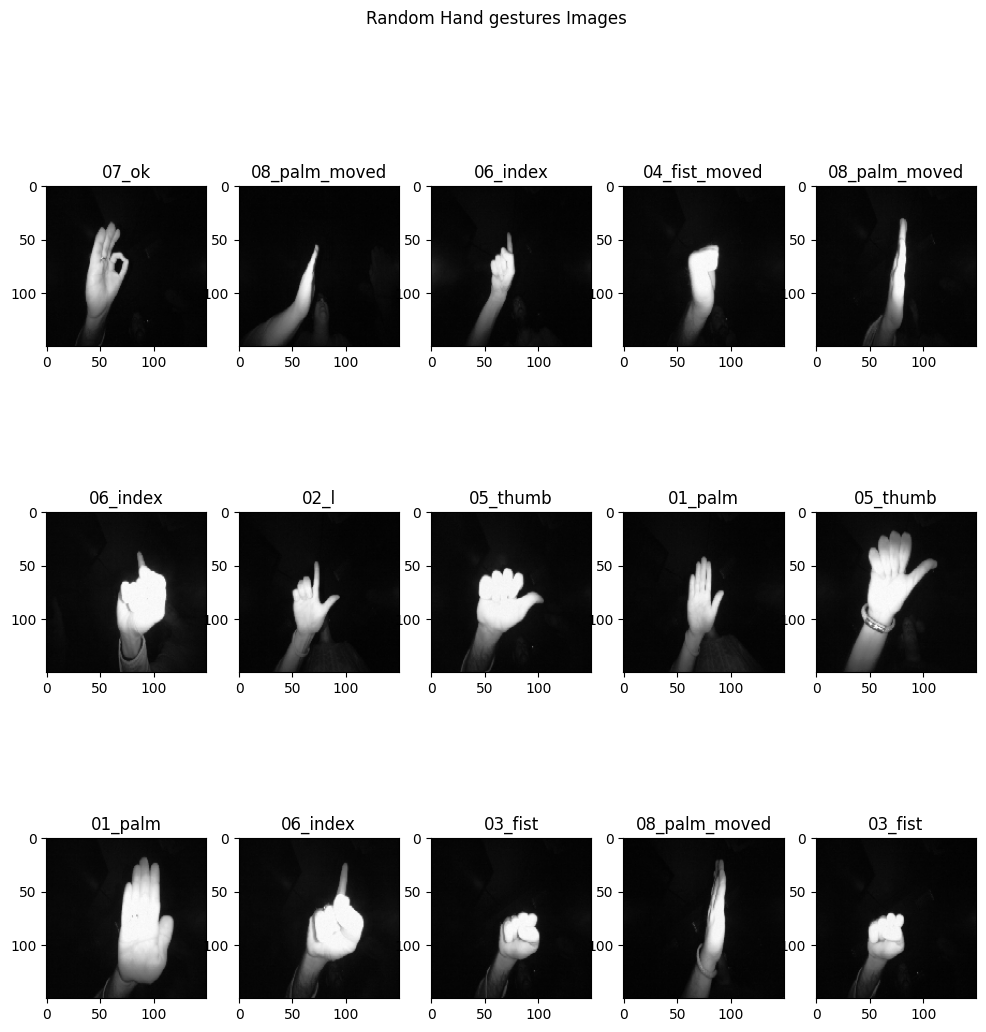

In [9]:
df_img = df['Image']
df_label = df['Label']

nrows = 3
ncols = 5
fig, axx = plt.subplots(nrows,ncols, figsize=(12,12))
fig.suptitle("Random Hand gestures Images")
print(axx)
for i in range(nrows):
    for j in range(ncols):
        n = np.random.randint(0,20099)
        img = load_img(df['Image'][n], target_size=(150,150))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img /= 255.0
        label = df_label[n]
        image = np.squeeze(img)
        axx[i][j].imshow(image)
        axx[i][j].set_title(label)
        
plt.show()
plt.close()

In [10]:
X_train, x = train_test_split(df, test_size=0.2)
x_valid, x_test = train_test_split(x,test_size=0.5)
X_train.info()
x_valid.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16080 entries, 3577 to 10936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   16080 non-null  object
 1   Label   16080 non-null  object
dtypes: object(2)
memory usage: 376.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2010 entries, 5762 to 3283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   2010 non-null   object
 1   Label   2010 non-null   object
dtypes: object(2)
memory usage: 47.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2010 entries, 1301 to 3855
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   2010 non-null   object
 1   Label   2010 non-null   object
dtypes: object(2)
memory usage: 47.1+ KB


In [11]:
datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            brightness_range=[0.2,1.2])


train_datagen = ImageDataGenerator(rescale=1/255.0,
                                    shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
validate_datagen = ImageDataGenerator(rescale=1/255.0)

In [12]:
b_size=1
train_generator = train_datagen.flow_from_dataframe(dataframe=X_train,
                                                   x_col="Image",y_col='Label',
                                                   class_mode="categorical",
                                                   target_size=(150,150),
                                                   batch_size=b_size,
                                                   seed=2020, shuffle=True)

valid_generator = validate_datagen.flow_from_dataframe(dataframe=x_valid,x_col='Image',
                                                      y_col='Label',
                                                      class_mode="categorical",
                                                      target_size=(150,150),
                                                      seed=2020,
                                                      batch_size=b_size,
                                                      shuffle=False)

Found 16000 validated image filenames belonging to 10 classes.


c:\Users\kunal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 80 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


Found 2003 validated image filenames belonging to 10 classes.


c:\Users\kunal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 7 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


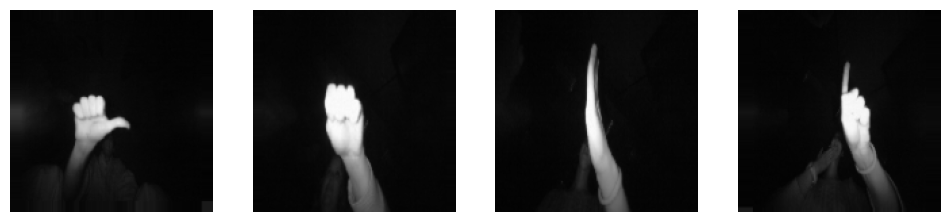

In [13]:
# plotting some augmented images
fig, axx = plt.subplots(nrows=1,ncols=4, figsize=(12,12))

for i in range(4):
    # convert into unsigned integers for plotting
    image = next(train_generator)[0].astype('float64')
    image = np.squeeze(image)
    axx[i].imshow(image)
    axx[i].axis('off')

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# On top of the model we add 2 fully connected layers to flatten 
# the 3D feature maps into 10 feature vectors representing 10 different
# categories of hand gestures

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
             optimizer = 'adam',
             metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()

c:\Users\kunal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,213,098 (4.63 MB)

 Trainable params: 1,213,098 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(train_generator, steps_per_epoch=2000//b_size,
                   epochs = 20,
                   validation_data=valid_generator,
                   validation_steps=800//b_size)

model.save('handG_Rec.h5')

Epoch 1/20


c:\Users\kunal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - categorical_accuracy: 0.2201 - loss: 2.1173 - val_categorical_accuracy: 0.8450 - val_loss: 0.5471
Epoch 2/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 93s 47ms/step - categorical_accuracy: 0.7778 - loss: 0.7321 - val_categorical_accuracy: 0.9463 - val_loss: 0.1897
Epoch 3/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 88s 44ms/step - categorical_accuracy: 0.8726 - loss: 0.3919 - val_categorical_accuracy: 0.9702 - val_loss: 0.1342
Epoch 4/20
   5/2000 ━━━━━━━━━━━━━━━━━━━━ 56s 28ms/step - categorical_accuracy: 1.0000 - loss: 0.0067

c:\Users\kunal\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 74s 37ms/step - categorical_accuracy: 0.9114 - loss: 0.2754 - val_categorical_accuracy: 0.9900 - val_loss: 0.0638
Epoch 5/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 66s 33ms/step - categorical_accuracy: 0.9171 - loss: 0.2696 - val_categorical_accuracy: 0.9875 - val_loss: 0.0447
Epoch 6/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 74s 37ms/step - categorical_accuracy: 0.9169 - loss: 0.2794 - val_categorical_accuracy: 0.9777 - val_loss: 0.0723
Epoch 7/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - categorical_accuracy: 0.9487 - loss: 0.1733 - val_categorical_accuracy: 0.9875 - val_loss: 0.0485
Epoch 8/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - categorical_accuracy: 0.9461 - loss: 0.1823 - val_categorical_accuracy: 0.9837 - val_loss: 0.0467
Epoch 9/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - categorical_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_categorical_accuracy: 0.9901 - val_loss: 0.0550
Epoch 10/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 69s 34ms/step - categori

In [16]:
history.history

{'categorical_accuracy': [0.4115000069141388,
  0.809499979019165,
  0.8840000033378601,
  0.9075000286102295,
  0.921999990940094,
  0.9290000200271606,
  0.9520000219345093,
  0.9455000162124634,
  0.0,
  0.9495000243186951,
  0.9564999938011169,
  0.9599999785423279,
  0.9605000019073486,
  0.9635000228881836,
  0.9614999890327454,
  0.9695000052452087,
  0.9664999842643738,
  0.0,
  0.9729999899864197,
  0.9760000109672546],
 'loss': [1.7017881870269775,
  0.6310533285140991,
  0.3830798864364624,
  0.28608906269073486,
  0.26235342025756836,
  0.2301688939332962,
  0.16208164393901825,
  0.17207564413547516,
  0.0,
  0.17577241361141205,
  0.13737906515598297,
  0.11990979313850403,
  0.1385757178068161,
  0.1201140508055687,
  0.13714830577373505,
  0.09863172471523285,
  0.12058568000793457,
  0.0,
  0.08174870163202286,
  0.08885209262371063],
 'val_categorical_accuracy': [0.8450000286102295,
  0.9462500214576721,
  0.9702233076095581,
  0.9900000095367432,
  0.987500011920929,

In [17]:
fig = go.Figure()
epochs = 20
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
y=history.history['loss'],
mode='lines',
name=f'training loss',
marker_size=3,
line_color='blue'))
fig.add_trace(go.Scatter(x=np.arange(0, epochs, 1),
                         y=history.history['val_loss'],
                         mode='lines',
                         name=f'Validation loss',
                         line_color='grey'))
fig.update_layout(
                  title="CNN training loss",
                  xaxis_title="Epochs",
                  yaxis_title=f"CategoricalCrossentropy")
                  
fig.update_layout({'plot_bgcolor': '#f2f8fd' , 
                   'paper_bgcolor': 'white',}, 
                   template='plotly_white')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'blue'},
              'marker': {'size': 3},
              'mode': 'lines',
              'name': 'training loss',
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19]),
              'y': [1.7017881870269775, 0.6310533285140991, 0.3830798864364624,
                    0.28608906269073486, 0.26235342025756836, 0.2301688939332962,
                    0.16208164393901825, 0.17207564413547516, 0.0,
                    0.17577241361141205, 0.13737906515598297, 0.11990979313850403,
                    0.1385757178068161, 0.1201140508055687, 0.13714830577373505,
                    0.09863172471523285, 0.12058568000793457, 0.0,
                    0.08174870163202286, 0.08885209262371063]},
             {'line': {'color': 'grey'},
              'mode': 'lines',
              'name': 'Validation loss',
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19]),
              'y': [0.5471024513244629, 0.18974146246910095, 0.13418251276016235,
                    0.06379933655261993, 0.044679030776023865, 0.07227729260921478,
                    0.04851632937788963, 0.046676427125930786, 0.05495834723114967,
                    0.041670020669698715, 0.024898666888475418,
                    0.044756438583135605, 0.03152850270271301, 0.05174228549003601,
                    0.026636118069291115, 0.018481099978089333,
                    0.026345660910010338, 0.01865173876285553,
                    0.0033643515780568123, 0.02167792245745659]}],
    'layout': {'paper_bgcolor': 'white',
               'plot_bgcolor': '#f2f8fd',
               'template': '...',
               'title': {'text': 'CNN training loss'},
               'xaxis': {'title': {'text': 'Epochs'}},
               'yaxis': {'title': {'text': 'CategoricalCrossentropy'}}}
})

In [21]:
# visualize training accuracy and validation accuracy
fig = go.Figure()
epochs = 20
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
                        y = history.history['categorical_accuracy'],
                        mode='lines',
                        name=f'Training accuracy',
                        marker_size=3,
                        line_color='blue'))
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
                        y = history.history['val_categorical_accuracy'],
                        mode='lines',
                        name=f'Validation accuracy',
                        marker_size=3,
                        line_color='grey'))
fig.update_layout(title="CNN Training accuracy",
                 xaxis_title='Epochs',
                  yaxis_title=f"CategoricalCrossentropy")

fig.update_layout({'plot_bgcolor':'#f2f9fd',
                  'paper_bgcolor':'white',},
                 template ='plotly_white')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'blue'},
              'marker': {'size': 3},
              'mode': 'lines',
              'name': 'Training accuracy',
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19]),
              'y': [0.4115000069141388, 0.809499979019165, 0.8840000033378601,
                    0.9075000286102295, 0.921999990940094, 0.9290000200271606,
                    0.9520000219345093, 0.9455000162124634, 0.0,
                    0.9495000243186951, 0.9564999938011169, 0.9599999785423279,
                    0.9605000019073486, 0.9635000228881836, 0.9614999890327454,
                    0.9695000052452087, 0.9664999842643738, 0.0,
                    0.9729999899864197, 0.9760000109672546]},
             {'line': {'color': 'grey'},
              'marker': {'size': 3},
              'mode': 'lines',
              'name': 'Validation accuracy',
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19]),
              'y': [0.8450000286102295, 0.9462500214576721, 0.9702233076095581,
                    0.9900000095367432, 0.987500011920929, 0.977667510509491,
                    0.987500011920929, 0.9837499856948853, 0.9900744557380676,
                    0.9900000095367432, 0.9950000047683716, 0.9950371980667114,
                    0.9900000095367432, 0.9862499833106995, 0.9950371980667114,
                    0.9975000023841858, 0.9912499785423279, 0.9975185990333557,
                    1.0, 0.9937499761581421]}],
    'layout': {'paper_bgcolor': 'white',
               'plot_bgcolor': '#f2f9fd',
               'template': '...',
               'title': {'text': 'CNN Training accuracy'},
               'xaxis': {'title': {'text': 'Epochs'}},
               'yaxis': {'title': {'text': 'CategoricalCrossentropy'}}}
})

In [19]:
x_test.info()
x_test.tail(20)
samples = x_test.sample(n=5)

<class 'pandas.core.frame.DataFrame'>
Index: 2010 entries, 1301 to 3855
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   2010 non-null   object
 1   Label   2010 non-null   object
dtypes: object(2)
memory usage: 47.1+ KB


In [20]:
model = load_model('./handG_Rec.h5',compile=True)